# Explore here

In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", delimiter =',')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.to_csv("../data/raw/data.csv", index = False)

In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.shape

(1337, 7)

## EDA

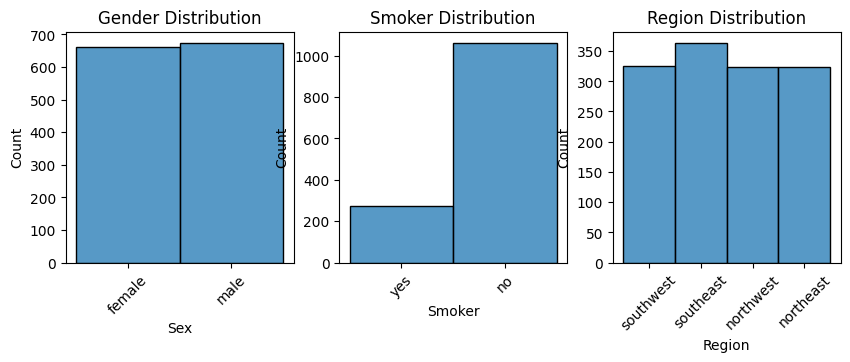

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize=(10, 3))  # Expanded figure size and grid

# Job type histogram
sns.histplot(ax=axis[0], data = data, x="sex")
axis[0].set_title("Gender Distribution")
axis[0].set_xlabel("Sex")
axis[0].set_ylabel("Count")
axis[0].tick_params(axis='x', rotation=45)

# Marital status histogram
sns.histplot(ax=axis[1], data=data, x="smoker", discrete=True)
axis[1].set_title("Smoker Distribution")
axis[1].set_xlabel("Smoker")
axis[1].tick_params(axis='x', rotation=45)

# Education level histogram
sns.histplot(ax=axis[2], data=data, x="region", discrete=True)
axis[2].set_title("Region Distribution")
axis[2].set_xlabel("Region")
axis[2].tick_params(axis='x', rotation=45)


Text(0, 0.5, 'Count')

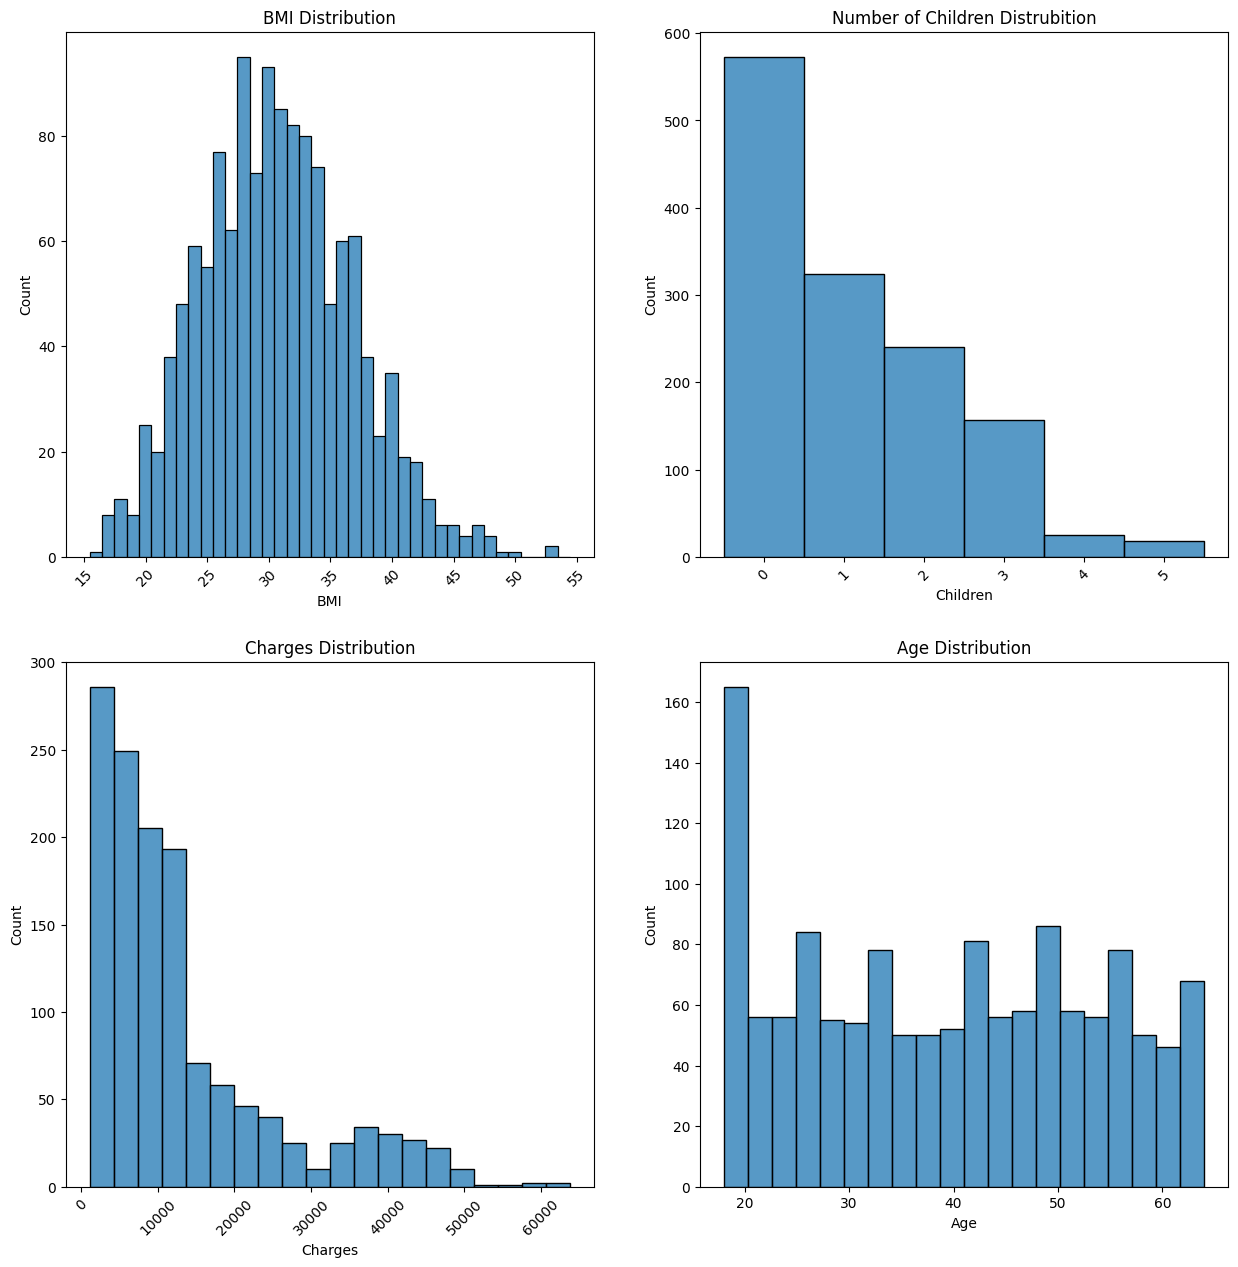

In [10]:
fig, axis = plt.subplots(2, 2, figsize=(15, 15))  # Expanded figure size and grid

# Job type histogram
sns.histplot(ax=axis[0, 0], data=data, x="bmi", discrete=True)
axis[0, 0].set_title("BMI Distribution")
axis[0, 0].set_xlabel("BMI")
axis[0, 0].set_ylabel("Count")
axis[0, 0].tick_params(axis='x', rotation=45)

# Marital status histogram
sns.histplot(ax=axis[0, 1], data=data, x="children", discrete=True)
axis[0, 1].set_title("Number of Children Distrubition")
axis[0, 1].set_xlabel("Children")
axis[0, 1].tick_params(axis='x', rotation=45)

# Education level histogram
sns.histplot(ax=axis[1, 0], data=data, x="charges", bins = 20)
axis[1, 0].set_title("Charges Distribution")
axis[1, 0].set_xlabel("Charges")
axis[1, 0].tick_params(axis='x', rotation=45)

# Age distribution histogram
sns.histplot(ax=axis[1, 1], data=data, x="age", bins=20)
axis[1, 1].set_title("Age Distribution")
axis[1, 1].set_xlabel("Age")
axis[1, 1].set_ylabel("Count")

In [11]:
# One-hot encode categorical columns like 'sex', 'smoker', 'region'
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [12]:
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


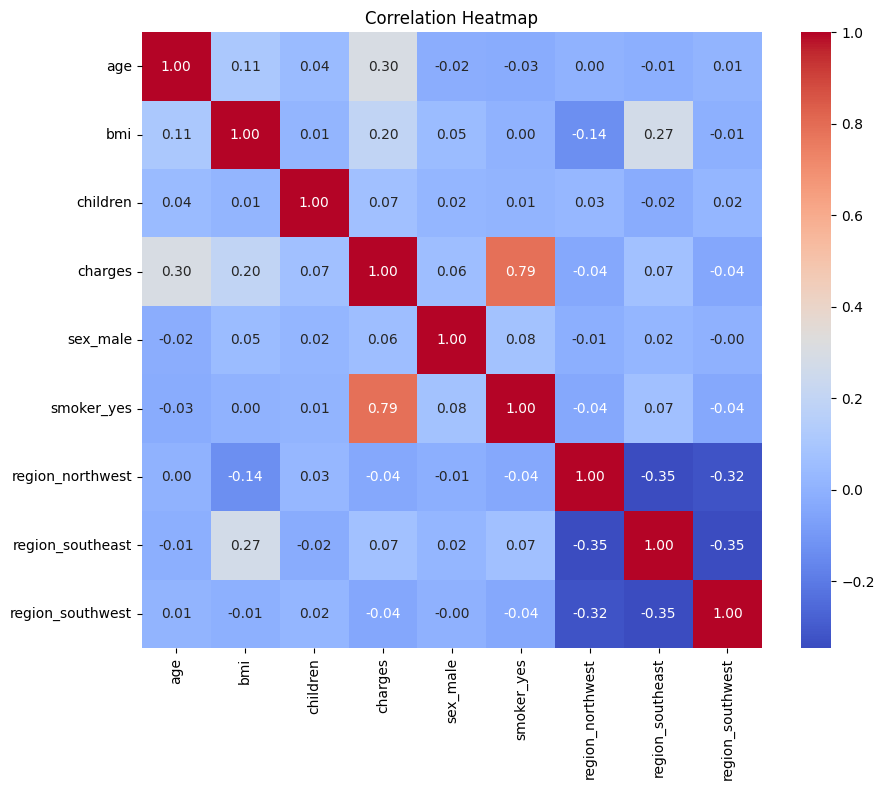

In [14]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Feature and target separation
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
X = data_encoded.drop("charges", axis=1)
y = data_encoded["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(MSE)
print(R2)


35478020.67523561
0.8069287081198011
